In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import math

In [3]:
def multivariate_normal(mean1, mean2, std1, std2, rho, n):
  means = np.array([mean1, mean2])
  covs = np.array([
    [std1 ** 2, std1 * std2 * rho],
    [std1 * std2 * rho, std2 ** 2],
  ])
  return np.random.default_rng().multivariate_normal(means, covs, n).T

In [4]:
ns = np.array([20, 60, 100])
rhos = np.array([0, 0.5, 0.9])

for n in ns:
  for rho in rhos:
    pearson_coefs = np.array([])
    spearman_coefs = np.array([])
    quadrant_coefs = np.array([])

    for i in range(1000):
      x, y = multivariate_normal(0, 0, 1, 1, rho, n)
      pearson_coef = pearsonr(x, y)[0]
      spearman_coef = spearmanr(x, y)[0]
      quadrant_coef = math.sqrt(2) * np.mean(np.sign(x - np.median(x)) * np.sign(y - np.median(y)))

      pearson_coefs = np.append(pearson_coefs, pearson_coef)
      spearman_coefs = np.append(spearman_coefs, spearman_coef)
      quadrant_coefs = np.append(quadrant_coefs, quadrant_coef)

    print(f'\nSample size: {n}, Correlation coefficient (rho): {rho}')
    print('Pearson coefficients: Mean =', np.mean(pearson_coefs), 'Mean of squares =', np.mean(pearson_coefs ** 2), 'Variance =', np.var(pearson_coefs))
    print('Spearman coefficients: Mean =', np.mean(spearman_coefs), 'Mean of squares =', np.mean(spearman_coefs ** 2), 'Variance =', np.var(spearman_coefs))
    print('Quadrant coefficients: Mean =', np.mean(quadrant_coefs), 'Mean of squares =', np.mean(quadrant_coefs ** 2), 'Variance =', np.var(quadrant_coefs))



Sample size: 20, Correlation coefficient (rho): 0.0
Pearson coefficients: Mean = 0.0036541982885184513 Mean of squares = 0.05250613469586402 Variance = 0.05249278153073221
Spearman coefficients: Mean = 0.006639097744360901 Mean of squares = 0.05187403923342189 Variance = 0.051829961614562714
Quadrant coefficients: Mean = 0.003959797974644667 Mean of squares = 0.10672000000000004 Variance = 0.10670432000000002

Sample size: 20, Correlation coefficient (rho): 0.5
Pearson coefficients: Mean = 0.4957289708260874 Mean of squares = 0.27652496456044845 Variance = 0.030777752044156628
Spearman coefficients: Mean = 0.46905864661654134 Mean of squares = 0.25450600938436313 Variance = 0.03448999541862174
Quadrant coefficients: Mean = 0.46725616100807066 Mean of squares = 0.31168000000000007 Variance = 0.09335168000000002

Sample size: 20, Correlation coefficient (rho): 0.9
Pearson coefficients: Mean = 0.8965527143417165 Mean of squares = 0.8061514915891177 Variance = 0.0023447219956182633
Spearm

In [5]:
for n in ns:
  pearson_coefs = np.array([])
  spearman_coefs = np.array([])
  quadrant_coefs = np.array([])

  for i in range(1000):
    x, y = multivariate_normal(0, 0, 1, 1, 0.9, n) * 0.9 + multivariate_normal(0, 0, 10, 10, -0.9, n) * 0.1
    pearson_coef = pearsonr(x, y)[0]
    spearman_coef = spearmanr(x, y)[0]
    quadrant_coef = math.sqrt(2) * np.mean(np.sign(x - np.median(x)) * np.sign(y - np.median(y)))

    pearson_coefs = np.append(pearson_coefs, pearson_coef)
    spearman_coefs = np.append(spearman_coefs, spearman_coef)
    quadrant_coefs = np.append(quadrant_coefs, quadrant_coef)

  print(f'\nSample size: {n}')
  print('Pearson coefficients: Mean =', np.mean(pearson_coefs), 'Mean of squares =', np.mean(pearson_coefs ** 2), 'Variance =', np.var(pearson_coefs))
  print('Spearman coefficients: Mean =', np.mean(spearman_coefs), 'Mean of squares =', np.mean(spearman_coefs ** 2), 'Variance =', np.var(spearman_coefs))
  print('Quadrant coefficients: Mean =', np.mean(quadrant_coefs), 'Mean of squares =', np.mean(quadrant_coefs ** 2), 'Variance =', np.var(quadrant_coefs))


Sample size: 20
Pearson coefficients: Mean = -0.09434778360226923 Mean of squares = 0.061769138448741774 Variance = 0.05286763417808114
Spearman coefficients: Mean = -0.08985864661654135 Mean of squares = 0.05958758098253151 Variance = 0.05151300461077505
Quadrant coefficients: Mean = -0.08852976900455577 Mean of squares = 0.10856000000000005 Variance = 0.10072248000000003

Sample size: 60
Pearson coefficients: Mean = -0.0927409087874175 Mean of squares = 0.024321680163448146 Variance = 0.015720804000732048
Spearman coefficients: Mean = -0.08979394276187833 Mean of squares = 0.023616120757201486 Variance = 0.015553168600478003
Quadrant coefficients: Mean = -0.08617274640060059 Mean of squares = 0.04056888888888889 Variance = 0.033143146666666665

Sample size: 100
Pearson coefficients: Mean = -0.09828812702922497 Mean of squares = 0.019411312074918727 Variance = 0.009750756160005664
Spearman coefficients: Mean = -0.0920051605160516 Mean of squares = 0.018177941654903558 Variance = 0.00

In [6]:
def add_confidence_ellipse(x, y, ax, std, **kwargs):
  cov = np.cov(x, y)
  pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
  ell_radius_x = np.sqrt(1 + pearson)
  ell_radius_y = np.sqrt(1 - pearson)
  ellipse = Ellipse(
    (0, 0),
    width=ell_radius_x * 2,
    height=ell_radius_y * 2,
    facecolor='none',
    **kwargs,
  )

  scale_x = np.sqrt(cov[0, 0]) * std
  mean_x = np.mean(x)

  scale_y = np.sqrt(cov[1, 1]) * std
  mean_y = np.mean(y)

  transf = transforms.Affine2D() \
      .rotate_deg(45) \
      .scale(scale_x, scale_y) \
      .translate(mean_x, mean_y)

  ellipse.set_transform(transf + ax.transData)
  return ax.add_patch(ellipse)

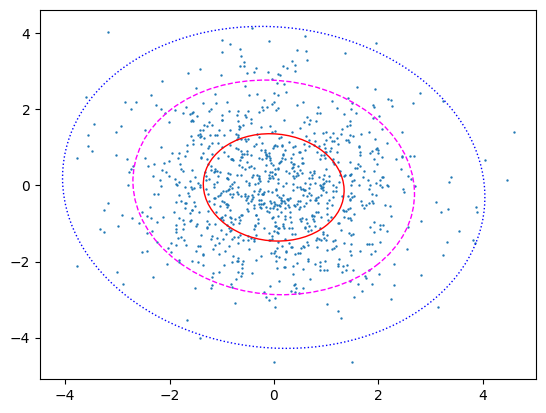

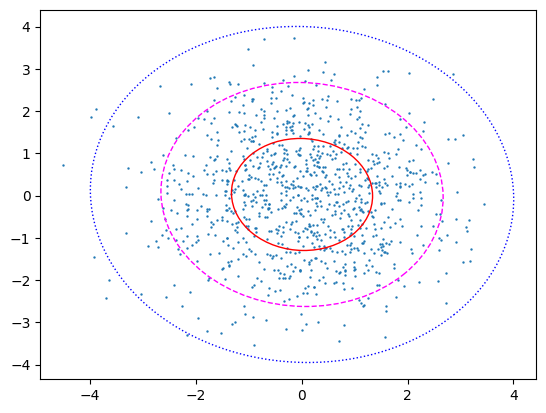

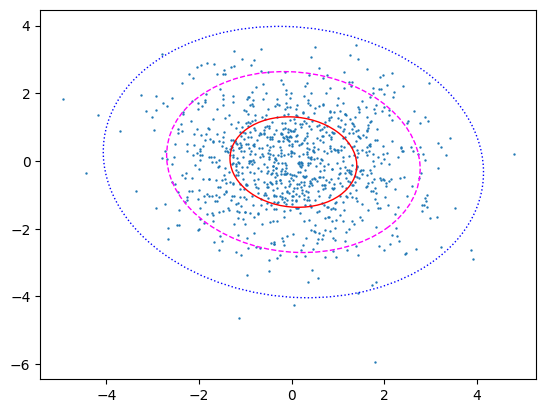

In [12]:
for rho in rhos:
  x, y = multivariate_normal(0, 0, 1, 1, rho, 1000) * 0.9 + multivariate_normal(0, 0, 10, 10, -rho, 1000) * 0.1

  fig, ax = plt.subplots(1, 1)
  ax.scatter(x, y, s=0.5)

  add_confidence_ellipse(x, y, ax, 1, edgecolor='red')
  add_confidence_ellipse(x, y, ax, 2, edgecolor='fuchsia', linestyle='--')
  add_confidence_ellipse(x, y, ax, 3, edgecolor='blue', linestyle=':')

  plt.show()